# Telecom Customer Churn


**Context**

Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

**Content**

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

**The data set includes information about:**

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import pydotplus
import matplotlib.pyplot as plt
import matplotlib.colors as pltc
%matplotlib inline
import statsmodels.api as sm
from random import sample
from graphviz import Source
from IPython.display import SVG
from IPython.display import display
from IPython.display import Image 
from sklearn import tree
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split,KFold, GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, confusion_matrix, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

In [2]:
# Importing Data files
telecom=pd.read_csv('Telco-Customer-Churn.csv')
telecom_orig=telecom.copy()

In [4]:
telecom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
telecom.describe(include="all")

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531,2
top,6532-YLWSI,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


## Data Preprocessing

#### Missing Values

In [6]:
#Missing value Imputation
telecom['TotalCharges']=telecom['TotalCharges'].replace(" ", np.nan)
print("Missing Value Percentage in TotalCharges:",
      round(telecom['TotalCharges'].isnull().sum()*100/telecom['TotalCharges'].shape[0],2))

Missing Value Percentage in TotalCharges: 0.16


Since missing values are very low, we'll drop the rows

In [7]:
#Dropping rows with missing values
telecom.dropna(axis=0,subset=['TotalCharges'], inplace=True)
telecom=telecom.reset_index(drop=True)

#### Changing column dtypes

In [8]:
# Divinding dataset into id,target, numeric and categorical variables
id_col=['customerID']

target_col=['Churn']

num_cols=['tenure','MonthlyCharges', 'TotalCharges']

cat_cols=[i for i in telecom.columns if i not in id_col+target_col+num_cols]

In [9]:
telecom['Churn']=telecom['Churn'].apply(lambda x: 1 if x=='Yes' else 0)
telecom['Churn']=telecom['Churn'].astype("category")
for i in cat_cols:
    telecom[i]=telecom[i].astype('category')
telecom[num_cols]=telecom[num_cols].apply(pd.to_numeric)

In [10]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
customerID          7032 non-null object
gender              7032 non-null category
SeniorCitizen       7032 non-null category
Partner             7032 non-null category
Dependents          7032 non-null category
tenure              7032 non-null int64
PhoneService        7032 non-null category
MultipleLines       7032 non-null category
InternetService     7032 non-null category
OnlineSecurity      7032 non-null category
OnlineBackup        7032 non-null category
DeviceProtection    7032 non-null category
TechSupport         7032 non-null category
StreamingTV         7032 non-null category
StreamingMovies     7032 non-null category
Contract            7032 non-null category
PaperlessBilling    7032 non-null category
PaymentMethod       7032 non-null category
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null catego

#### Using Weight of Evidence Method to convert Tenure to a categorical Variable

In [11]:
def is_monotonic(x):
    dx = np.diff(x)
    return np.all(dx <= 0) or np.all(dx >= 0)


def bins(data,variable, n):
    bins=np.linspace(data[variable].min(), data[variable].max(),n+1)
    ls=[]
    for i in range(0,n):
        ls.append((bins[i],bins[i+1]))
    return pd.Series(ls)    

def weight_of_evidence(data, variable,target, bins_var,good_label):
    good=[]
    bad=[]
    for i in bins_var:
        good.append((data[(data[variable]>=i[0]) 
                              & (data[variable]<= i[1])][str(target)]==good_label).sum())
        bad.append((data[(data[variable]>=i[0]) 
                              & (data[variable] <= i[1])][str(target)]!=good_label).sum())
    woe=pd.DataFrame({"Bins": bins_var,'Good': good, 'Bad':bad})
    
    woe['WOE']=np.log(woe['Good'])-np.log(woe['Bad'])
    woe['Info_value']=woe['WOE']*((woe['Good']/woe['Good'].sum())-(woe['Bad']/woe['Bad'].sum()))
    print("Information Value for {} is {}".format(variable, woe['Info_value'].sum()))
    print('WOE is monotonic:', is_monotonic(woe['WOE']))
    return woe

In [12]:
# bins_tenure=bins(telecom, 'tenure',6)
bins_tenure=[(0,12),(12,24),(24,36),(36,48),(48,60),(60,72)]
woe=weight_of_evidence(data=telecom, variable='tenure', target='Churn', bins_var=bins_tenure, good_label=0 )
display(woe)

Information Value for tenure is 0.7095400812600193
WOE is monotonic: True


,Bins,Good,Bad,WOE,Info_value
0,"(0, 12)",1138,1037,0.092940,-0.029991
1,"(12, 24)",809,332,0.890664,-0.019719
2,"(24, 36)",723,203,1.270203,0.035751
3,"(36, 48)",657,155,1.444259,0.058710
4,"(48, 60)",767,129,1.782674,0.131971
5,"(60, 72)",1384,99,2.637613,0.532818


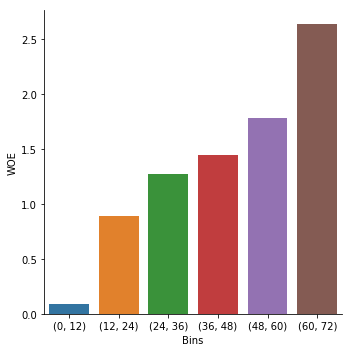

In [13]:
sns.catplot(x="Bins",y='WOE',kind='bar',data=woe)

As tenure increases, probability of churn reduces

In [14]:
def tenure_label(telecom) :
    
    if telecom["tenure"] <= 12 :
        return "Tenure_0-12"
    elif (telecom["tenure"] > 12) & (telecom["tenure"] <= 24 ):
        return "Tenure_12-24"
    elif (telecom["tenure"] > 24) & (telecom["tenure"] <= 48) :
        return "Tenure_24-48"
    elif (telecom["tenure"] > 48) & (telecom["tenure"] <= 60) :
        return "Tenure_48-60"
    elif telecom["tenure"] > 60 :
        return "Tenure_gt_60"
telecom["tenure_group"] = telecom.apply(lambda telecom:tenure_label(telecom),
                                      axis = 1)

## Data Visualisation

In [15]:
def univariate(variable, stats=True):
    
    if variable.dtype == np.int64 or variable.dtype == np.float64:
        sns.distplot(variable)
        if stats == True:
            print(variable.describe())
    
    elif data_type(variable) == 'category':
        sns.countplot(variable)
        if stats == True:
            print(variable.value_counts())
            
def donut_plot(data, variable):
    labels = ['Non_churn', 'Churn']
    sizes = data.groupby('Churn')['Churn'].count()
    labels_var = 2*data.groupby(variable)['Churn'].count().index.tolist()
    sizes_var= data.groupby(['Churn', variable])['Churn'].count()
    colors = ['#ff9999','#66b3ff']
    colors_var=2*['darkturquoise','plum','moccasin','powderblue','salmon','y'][0:data[variable].nunique()]


    # Plot
    plt.pie(sizes, labels=labels, colors=colors, startangle=90,frame=True)
    plt.pie(sizes_var,labels=labels_var,colors=colors_var, radius=0.65,startangle=90)
    centre_circle = plt.Circle((0,0),0.3,color='red', fc='white',linewidth=0)
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    plt.title("Churn-"+variable)
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64


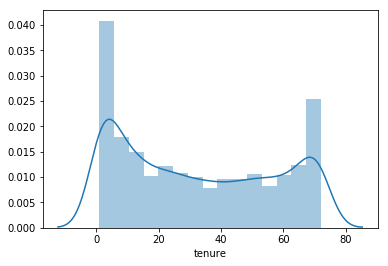

In [16]:
univariate(telecom['tenure'])

count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: MonthlyCharges, dtype: float64


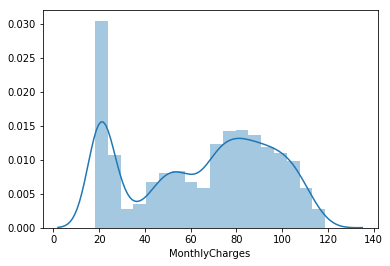

In [17]:
univariate(telecom['MonthlyCharges'])

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64


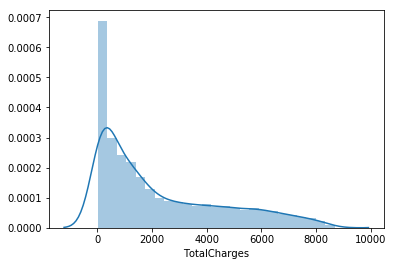

In [18]:
univariate(telecom['TotalCharges'])

In [19]:
cat_cols=cat_cols+['tenure_group']

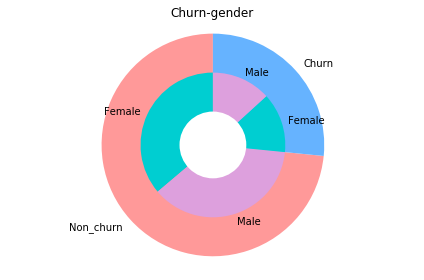

None

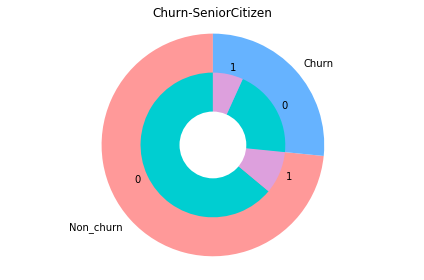

None

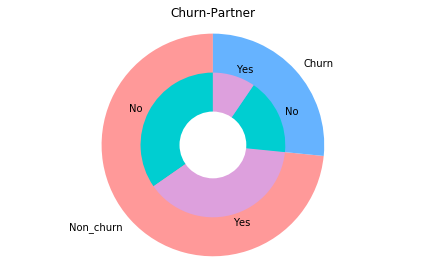

None

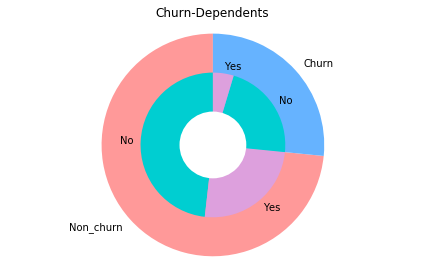

None

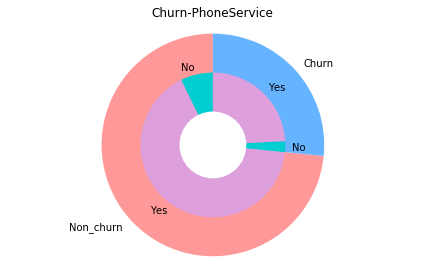

None

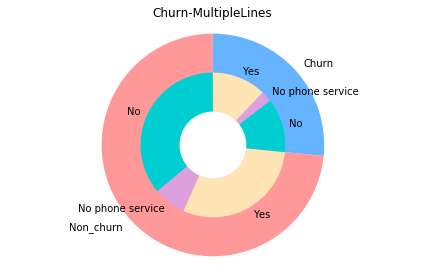

None

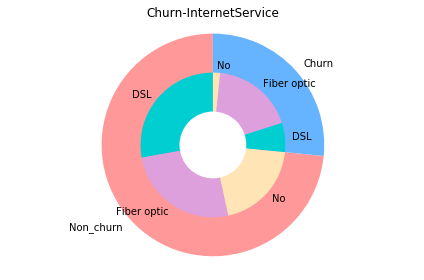

None

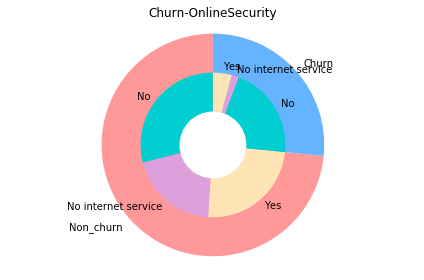

None

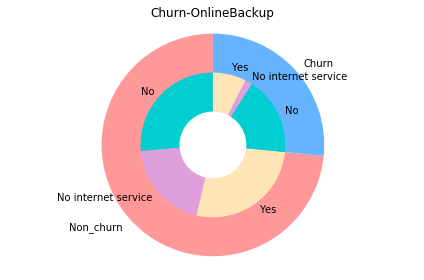

None

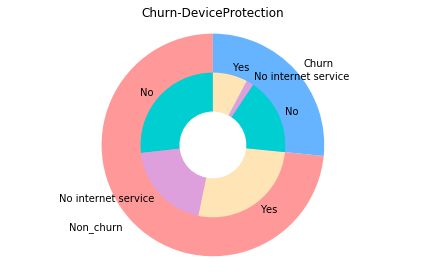

None

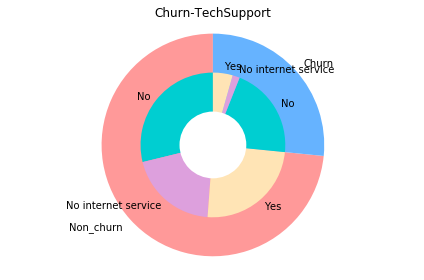

None

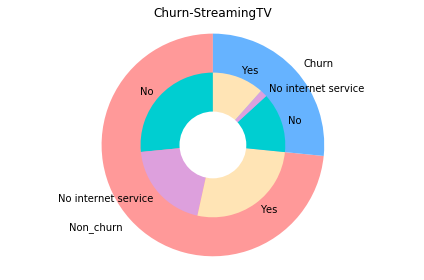

None

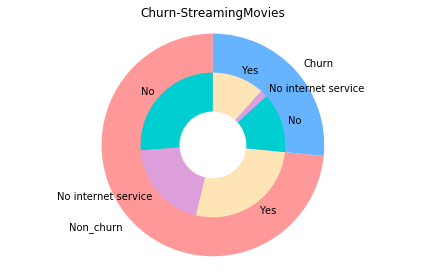

None

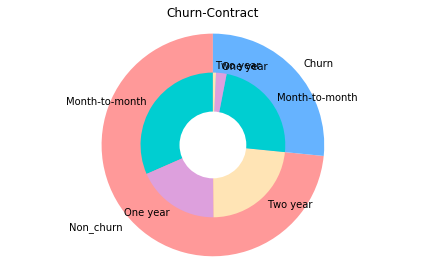

None

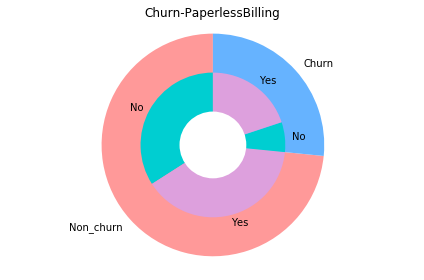

None

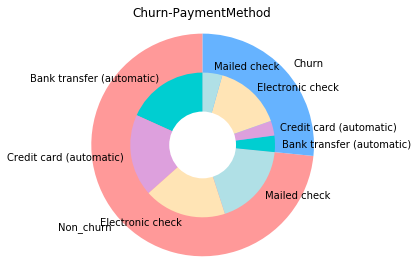

None

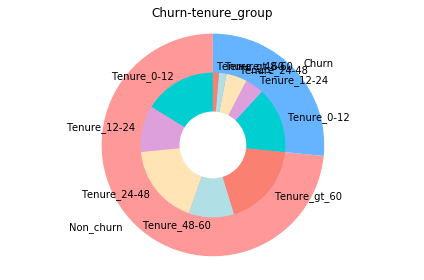

None

In [20]:
for i in cat_cols:
    display(donut_plot(telecom, i))

#### Creating dummy variables out of categorical variables

In [21]:
categorical=telecom[cat_cols]
telecom.drop(cat_cols, axis=1,inplace=True)

In [22]:
categorical=pd.get_dummies(categorical)

In [23]:
telecom=pd.concat([telecom, categorical], axis=1)

In [25]:
cols_del=['gender_Female', 'SeniorCitizen_0','Partner_No','Dependents_No','PhoneService_No',
          'MultipleLines_No phone service','InternetService_No','OnlineSecurity_No internet service',
          'OnlineBackup_No internet service','DeviceProtection_No internet service','TechSupport_No internet service',
          'StreamingTV_No internet service','Contract_Two year','StreamingMovies_No internet service',
          'PaperlessBilling_No','PaymentMethod_Bank transfer (automatic)','tenure','tenure_group_Tenure_gt_60']
telecom.drop(cols_del,1,inplace=True)

In [26]:
# Numeric Data standardisation
scaler = StandardScaler()
telecom[['MonthlyCharges','TotalCharges']] = scaler.fit_transform(telecom[['MonthlyCharges','TotalCharges']])

In [27]:
telecom.head()

,customerID,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Tenure_0-12,tenure_group_Tenure_12-24,tenure_group_Tenure_24-48,tenure_group_Tenure_48-60
0,7590-VHVEG,-1.161694,-0.994194,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0
1,5575-GNVDE,-0.260878,-0.173740,0,1,0,0,0,1,1,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0
2,3668-QPYBK,-0.363923,-0.959649,1,1,0,0,0,1,1,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0
3,7795-CFOCW,-0.747850,-0.195248,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0
4,9237-HQITU,0.196178,-0.940457,1,0,0,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0


## Model Building : Logistic Regression

In [28]:
#Splitting dataset into regressors and regressand
X=telecom.drop(['Churn','customerID'], axis=1)
y=telecom['Churn']

In [29]:
#Splitting data into train and test sets
X_train, X_test, y_train,  y_test= train_test_split(X, y, test_size=0.3, random_state=100)

In [30]:
# print shapes of train and test sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4922, 33)
(4922,)
(2110, 33)
(2110,)


In [31]:
# Logistic regression model
logreg = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logreg.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4895
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2011.0
Date:                Tue, 18 Jun 2019   Deviance:                       4022.1
Time:                        21:57:07   Pearson chi2:                 4.94e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -8.0553      2.541     -3.170      0.002     -13.036      -3.074
MonthlyCharges                           -1.7427      1.167     -1.493      0.135      -4.030       0.545
TotalCharges                             -0.3075      0.154     -1.994      0.046      -0.610      -0.005
gender_Male                              -0.0445      0.079     -0.567      0.571      -0.199       0.109
SeniorCitizen_1                           0.4019      0.102      3.956      0.000       0.203       0.601
Partner_Yes                               0.0138      0.094      0.147      0.883      -0.170       0.197
Dependents_Yes                           -0.1338      0.107     -1.245      0.213      -0.344       0.077
PhoneService_Yes                          0.7603      0.592      1.285      0.199      -0.400       1.920
MultipleLines_No                          0.1080      0.206      0.524      0.600      -0.296       0.512
MultipleLines_Yes                         0.6523      0.395      1.653      0.098      -0.121       1.426
InternetService_DSL                      -0.5189      0.176     -2.955      0.003      -0.863      -0.175
InternetService_Fiber optic               1.8690      0.804      2.324      0.020       0.293       3.445
OnlineSecurity_No                         0.7030      0.228      3.077      0.002       0.255       1.151
OnlineSecurity_Yes                        0.6471      0.419      1.546      0.122      -0.173       1.468
OnlineBackup_No                           0.6005      0.228      2.639      0.008       0.155       1.046
OnlineBackup_Yes                          0.7496      0.418      1.794      0.073      -0.070       1.569
DeviceProtection_No                       0.5198      0.227      2.291      0.022       0.075       0.964
DeviceProtection_Yes                      0.8303      0.419      1.981      0.048       0.009       1.652
TechSupport_No                            0.6852      0.229      2.997      0.003       0.237       1.133
TechSupport_Yes                           0.6649      0.419      1.589      0.112      -0.155       1.485
StreamingTV_No                            0.2101      0.135      1.559      0.119      -0.054       0.474
StreamingTV_Yes                           1.1400      0.515      2.213      0.027       0.130       2.150
StreamingMovies_No                        0.2657      0.135      1.968      0.049       0.001       0.530
StreamingMovies_Yes                       1.0845      0.515      2.107      0.035       0.076       2.093
Contract_Month-to-month                   1.5876      0.220      7.206      0.000       1.156       2.019
Contract_One year                         0.8229      0.218      3.783      0.000       0.397       1.249
PaperlessBilling_Yes                      0.2959      0.090      3.281      0.001       

### Correlation Matrix

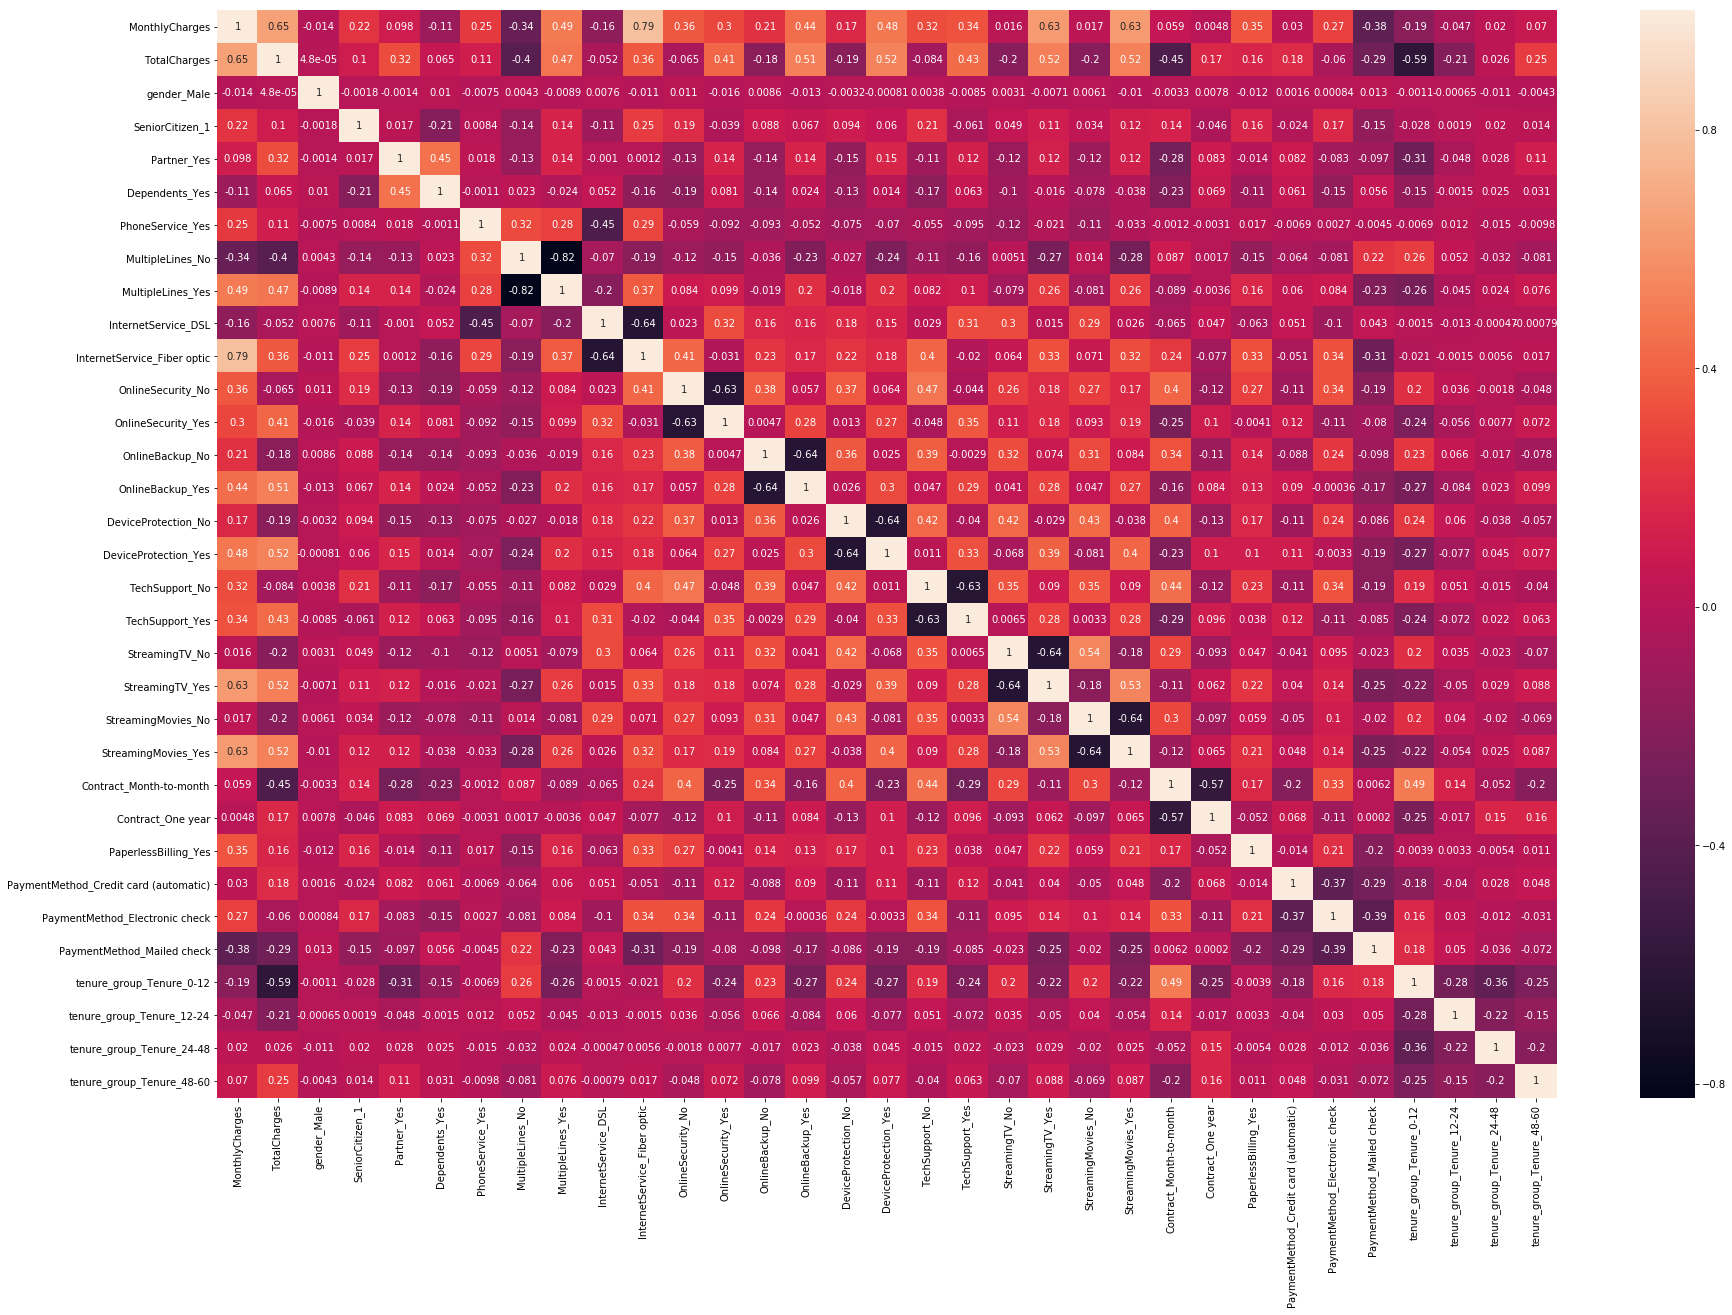

In [32]:
# Let's see the correlation matrix 
plt.figure(figsize = (30,20))        # Size of the figure
sns.heatmap(telecom.corr(),annot = True)

### Dropping highly correlated variables.

In [33]:
var_drop=['MultipleLines_No', 'OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No',
          'TechSupport_No','StreamingTV_No', 'StreamingMovies_No']
X_train2= X_train.drop(var_drop, axis=1)
X_test2= X_test.drop(var_drop, axis=1)

### Checking the correlation matrix

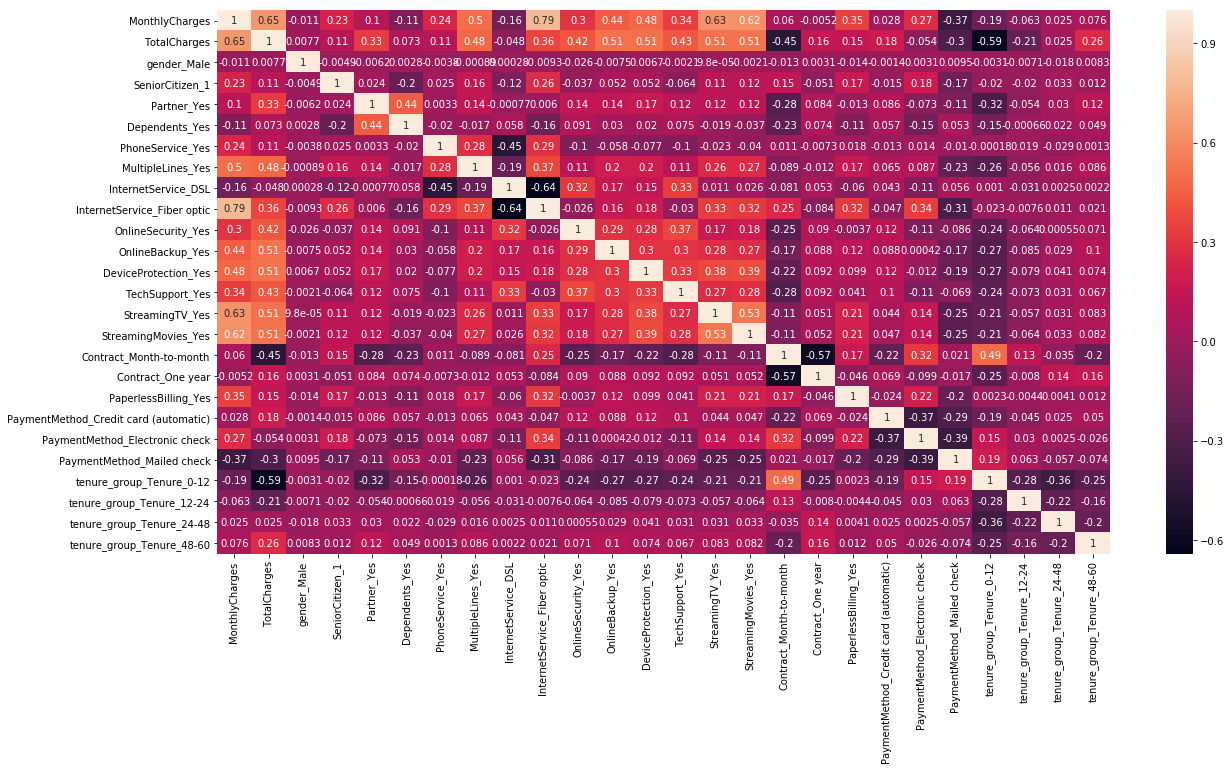

In [34]:
plt.figure(figsize=(20,10))
sns.heatmap(X_train2.corr(),annot=True)

### Re-running the model

In [35]:
# Logistic regression model
logreg = sm.GLM(y_train,(sm.add_constant(X_train2)), family = sm.families.Binomial())
logreg.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4895
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2011.0
Date:                Tue, 18 Jun 2019   Deviance:                       4022.1
Time:                        21:58:21   Pearson chi2:                 4.94e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -8.0553      2.541     -3.170      0.002     -13.036      -3.074
MonthlyCharges                           -1.7427      1.167     -1.493      0.135      -4.030       0.545
TotalCharges                             -0.3075      0.154     -1.994      0.046      -0.610      -0.005
gender_Male                              -0.0445      0.079     -0.567      0.571      -0.199       0.109
SeniorCitizen_1                           0.4019      0.102      3.956      0.000       0.203       0.601
Partner_Yes                               0.0138      0.094      0.147      0.883      -0.170       0.197
Dependents_Yes                           -0.1338      0.107     -1.245      0.213      -0.344       0.077
PhoneService_Yes                          0.8684      0.794      1.094      0.274      -0.687       2.424
MultipleLines_Yes                         0.5442      0.215      2.530      0.011       0.123       0.966
InternetService_DSL                       2.4653      0.987      2.497      0.013       0.530       4.400
InternetService_Fiber optic               4.8533      1.947      2.493      0.013       1.037       8.670
OnlineSecurity_Yes                       -0.0559      0.218     -0.257      0.797      -0.483       0.371
OnlineBackup_Yes                          0.1491      0.213      0.700      0.484      -0.269       0.567
DeviceProtection_Yes                      0.3106      0.216      1.437      0.151      -0.113       0.734
TechSupport_Yes                          -0.0204      0.218     -0.094      0.925      -0.447       0.406
StreamingTV_Yes                           0.9299      0.399      2.328      0.020       0.147       1.713
StreamingMovies_Yes                       0.8188      0.398      2.055      0.040       0.038       1.600
Contract_Month-to-month                   1.5876      0.220      7.206      0.000       1.156       2.019
Contract_One year                         0.8229      0.218      3.783      0.000       0.397       1.249
PaperlessBilling_Yes                      0.2959      0.090      3.281      0.001       0.119       0.473
PaymentMethod_Credit card (automatic)    -0.2487      0.136     -1.824      0.068      -0.516       0.018
PaymentMethod_Electronic check            0.1815      0.112      1.613      0.107      -0.039       0.402
PaymentMethod_Mailed check               -0.1805      0.137     -1.319      0.187      -0.449       0.088
tenure_group_Tenure_0-12                  1.1482      0.387      2.966      0.003       0.390       1.907
tenure_group_Tenure_12-24                 0.3189      0.349      0.913      0.361      -0.366       1.003
tenure_group_Tenure_24-48                 0.0961      0.271      0.355      0.723      -0.435       0.627
tenure_group_Tenure_48-60                 0.0675      0.219      0.309      0.757      -

### Feature Selection using RFE

In [37]:
logreg = LogisticRegression()
rfe = RFE(logreg,15)             # running RFE with 13 variables as output
rfe = rfe.fit(X,y)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)           # Printing the ranking

[ True  True False  True False False  True  True  True  True False  True
 False False  True False False False  True False False False False  True
  True  True False  True False  True False False False]
[ 1  1 16  1 17  3  1  1  1  1 14  1  4 15  1 18  5  6  1 11 10  9  8  1
  1  1  7  1 19  1  2 12 13]


In [38]:
cols=X_train.columns[rfe.support_]
cols

Index(['MonthlyCharges', 'TotalCharges', 'SeniorCitizen_1', 'PhoneService_Yes',
       'MultipleLines_No', 'MultipleLines_Yes', 'InternetService_DSL',
       'OnlineSecurity_No', 'OnlineBackup_Yes', 'TechSupport_Yes',
       'Contract_Month-to-month', 'Contract_One year', 'PaperlessBilling_Yes',
       'PaymentMethod_Electronic check', 'tenure_group_Tenure_0-12'],
      dtype='object')

In [39]:
X_train.columns[(rfe.ranking_==2)|(rfe.ranking_==3)]

Index(['Dependents_Yes', 'tenure_group_Tenure_12-24'], dtype='object')

In [40]:
# Let's run the model using the selected variables
logsk = LogisticRegression()
logsk.fit(X_train[cols], y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [41]:
#Comparing the model with StatsModels
logm4 = sm.GLM(y_train,(sm.add_constant(X_train[cols])), family = sm.families.Binomial())
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4907
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2018.5
Date:                Tue, 18 Jun 2019   Deviance:                       4037.0
Time:                        21:59:35   Pearson chi2:                 4.95e+03
No. Iterations:                     7   Covariance Type:             nonrobust
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -2.5292      0.267     -9.484      0.000      -3.052      -2.007
MonthlyCharges                     0.8861      0.080     11.083      0.000       0.729       1.043
TotalCharges                      -0.4355      0.084     -5.215      0.000      -0.599      -0.272
SeniorCitizen_1                    0.4138      0.100      4.154      0.000       0.219       0.609
PhoneService_Yes                  -0.5245      0.107     -4.882      0.000      -0.735      -0.314
MultipleLines_No                  -0.3241      0.066     -4.932      0.000      -0.453      -0.195
MultipleLines_Yes                 -0.2004      0.079     -2.533      0.011      -0.355      -0.045
InternetService_DSL               -0.2406      0.111     -2.169      0.030      -0.458      -0.023
OnlineSecurity_No                  0.4906      0.096      5.127      0.000       0.303       0.678
OnlineBackup_Yes                  -0.2747      0.094     -2.922      0.003      -0.459      -0.090
TechSupport_Yes                   -0.4527      0.105     -4.325      0.000      -0.658      -0.248
Contract_Month-to-month            1.6407      0.205      7.985      0.000       1.238       2.043
Contract_One year                  0.8319      0.208      3.995      0.000       0.424       1.240
PaperlessBilling_Yes               0.3075      0.090      3.424      0.001       0.132       0.484
PaymentMethod_Electronic check     0.3308      0.084      3.960      0.000       0.167       0.495
tenure_group_Tenure_0-12           0.8729      0.111      7.840      0.000       0.655       1.091
==================================================================================================
"""

### Variation Inflation Factor 

In [42]:
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [43]:
cols_drop=list(set(X_train.columns)-set(cols))+['customerID']

In [44]:
# Calculating Vif value
vif_cal(input_data=telecom.drop(cols_drop, axis=1), dependent_col='Churn')

,Var,Vif
3,PhoneService_Yes,inf
4,MultipleLines_No,inf
5,MultipleLines_Yes,inf
1,TotalCharges,4.14
0,MonthlyCharges,2.88
9,TechSupport_Yes,0.25
11,Contract_One year,0.24
14,tenure_group_Tenure_0-12,0.15
2,SeniorCitizen_1,0.14
7,OnlineSecurity_No,0.14


### Dropping variables with high VIF

In [51]:
cols2=cols.drop(['MultipleLines_No', 'MultipleLines_Yes'])

Re-running model with new set of variables

In [52]:
# Let's run the model using the selected variables
logsk = LogisticRegression()
logsk.fit(X_train[cols2], y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [53]:
logm5=sm.GLM(y_train, sm.add_constant(X_train[cols2]), family=sm.families.Binomial())
logm5.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4908
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2019.3
Date:                Tue, 18 Jun 2019   Deviance:                       4038.6
Time:                        22:01:47   Pearson chi2:                 4.95e+03
No. Iterations:                     7   Covariance Type:             nonrobust
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -2.4945      0.265     -9.408      0.000      -3.014      -1.975
MonthlyCharges                     0.9072      0.078     11.592      0.000       0.754       1.061
TotalCharges                      -0.4172      0.082     -5.077      0.000      -0.578      -0.256
SeniorCitizen_1                    0.4199      0.099      4.225      0.000       0.225       0.615
PhoneService_Yes                  -0.8251      0.158     -5.210      0.000      -1.135      -0.515
InternetService_DSL               -0.2406      0.111     -2.167      0.030      -0.458      -0.023
OnlineSecurity_No                  0.4899      0.096      5.124      0.000       0.303       0.677
OnlineBackup_Yes                  -0.2804      0.094     -2.988      0.003      -0.464      -0.097
TechSupport_Yes                   -0.4626      0.104     -4.433      0.000      -0.667      -0.258
Contract_Month-to-month            1.6431      0.206      7.991      0.000       1.240       2.046
Contract_One year                  0.8249      0.208      3.961      0.000       0.417       1.233
PaperlessBilling_Yes               0.3101      0.090      3.453      0.001       0.134       0.486
PaymentMethod_Electronic check     0.3309      0.084      3.962      0.000       0.167       0.495
tenure_group_Tenure_0-12           0.8635      0.111      7.776      0.000       0.646       1.081
==================================================================================================
"""

### Making Predictions

In [54]:
y_pred=logsk.predict_proba(X_test[cols2])

In [55]:
y_pred_df=pd.DataFrame(y_pred)

In [56]:
y_pred_df.head()

,0,1
0,0.589665,0.410335
1,0.658491,0.341509
2,0.980792,0.019208
3,0.354133,0.645867
4,0.985810,0.014190


In [57]:
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

In [58]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [59]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [60]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [61]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)

In [62]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})

In [63]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Churn,CustID,Churn_Prob
0,0,939,0.410335
1,1,3724,0.341509
2,0,1756,0.019208
3,1,2278,0.645867
4,0,1867,0.014190


In [64]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final['Churn_Prob'].apply( lambda x: 1 if x > 0.5 else 0)

### Model Evaluation 

In [65]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.Churn, y_pred_final.predicted )
confusion

array([[1378,  150],
       [ 287,  295]])

In [66]:
#Let's check the overall accuracy.
metrics.accuracy_score( y_pred_final.Churn, y_pred_final.predicted)

0.7928909952606635

In [67]:
TP = confusion[0,0] # true positive 
TN = confusion[1,1] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [68]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8276276276276276

In [69]:
# Let us calculate specificity
TN / float(TN+FP)

0.6629213483146067

In [70]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.33707865168539325


In [71]:
# positive predictive value 
print (TP / float(TP+FP))

0.9018324607329843


In [72]:
# Negative predictive value
print (TN / float(TN+ FN))

0.506872852233677


In [73]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

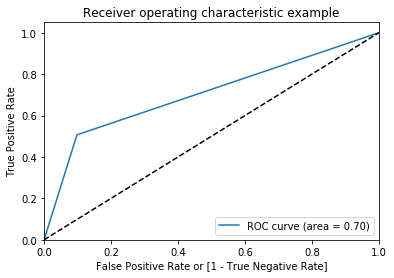

(array([0.        , 0.09816754, 1.        ]),
 array([0.        , 0.50687285, 1.        ]),
 array([2, 1, 0]))

In [74]:
draw_roc(y_pred_final.Churn, y_pred_final.predicted)

In [75]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.Churn_Prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,Churn,CustID,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,939,0.410335,0,1,1,1,1,1,0,0,0,0,0
1,1,3724,0.341509,0,1,1,1,1,0,0,0,0,0,0
2,0,1756,0.019208,0,1,0,0,0,0,0,0,0,0,0
3,1,2278,0.645867,1,1,1,1,1,1,1,1,0,0,0
4,0,1867,0.014190,0,1,0,0,0,0,0,0,0,0,0


In [76]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.Churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.275829  0.000000  1.000000
0.1   0.1  0.609479  0.481675  0.945017
0.2   0.2  0.710427  0.668194  0.821306
0.3   0.3  0.749763  0.753927  0.738832
0.4   0.4  0.784834  0.844241  0.628866
0.5   0.5  0.792891  0.901832  0.506873
0.6   0.6  0.785308  0.939136  0.381443
0.7   0.7  0.766351  0.967277  0.238832
0.8   0.8  0.735071  0.994764  0.053265
0.9   0.9  0.724645  1.000000  0.001718


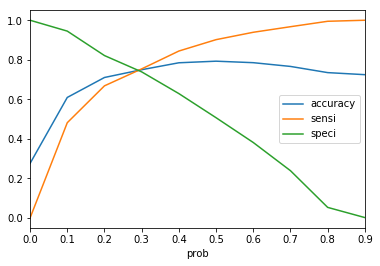

In [77]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

In [78]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.3 else 0)

In [79]:
y_pred_final.head()

,Churn,CustID,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,939,0.410335,0,1,1,1,1,1,0,0,0,0,0,1
1,1,3724,0.341509,0,1,1,1,1,0,0,0,0,0,0,1
2,0,1756,0.019208,0,1,0,0,0,0,0,0,0,0,0,0
3,1,2278,0.645867,1,1,1,1,1,1,1,1,0,0,0,1
4,0,1867,0.014190,0,1,0,0,0,0,0,0,0,0,0,0


In [80]:
#Let's check the overall accuracy.
metrics.accuracy_score( y_pred_final.Churn, y_pred_final.final_predicted)

0.7497630331753554

In [82]:
metrics.confusion_matrix( y_pred_final.Churn, y_pred_final.final_predicted )

array([[1152,  376],
       [ 152,  430]])

## Model Building: Tree Based Models

In [88]:
# Removing Null values from the original dataset
#Dropping rows with missing values
telecom_clean=telecom_orig[telecom_orig['TotalCharges']!=" "]

In [89]:
telecom_clean.describe(include="all")

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032,7032,7032.000000,7032,7032,7032.000000,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032.000000,7032,7032
unique,7032,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6530,2
top,6532-YLWSI,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No
freq,1,3549,NaN,3639,4933,NaN,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,NaN,11,5163
mean,NaN,NaN,0.162400,NaN,NaN,32.421786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.798208,NaN,NaN
std,NaN,NaN,0.368844,NaN,NaN,24.545260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.085974,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.587500,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.862500,NaN,NaN


In [90]:
# Divinding dataset into id,target, numeric and categorical variables
id_col=['customerID']

target_col=['Churn']

num_cols=['tenure','MonthlyCharges', 'TotalCharges']

cat_cols=[i for i in telecom_orig.columns if i not in id_col+target_col+num_cols]

In [91]:
# apply Label encoder to df_categorical
le=preprocessing.LabelEncoder()
telecom_clean[cat_cols]=telecom_clean[cat_cols].apply(le.fit_transform)
telecom_clean.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,No
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.5,No
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,Yes
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,No
4,9237-HQITU,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,Yes


In [93]:
# convert target variable income to categorical
telecom_clean['Churn']=telecom_clean['Churn'].astype('category')
telecom_clean['TotalCharges']=telecom_clean['TotalCharges'].astype('float64')


In [94]:
telecom_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7032 non-null object
gender              7032 non-null int64
SeniorCitizen       7032 non-null int64
Partner             7032 non-null int64
Dependents          7032 non-null int64
tenure              7032 non-null int64
PhoneService        7032 non-null int64
MultipleLines       7032 non-null int64
InternetService     7032 non-null int64
OnlineSecurity      7032 non-null int64
OnlineBackup        7032 non-null int64
DeviceProtection    7032 non-null int64
TechSupport         7032 non-null int64
StreamingTV         7032 non-null int64
StreamingMovies     7032 non-null int64
Contract            7032 non-null int64
PaperlessBilling    7032 non-null int64
PaymentMethod       7032 non-null int64
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null category
dtypes: category(1), float64(2), int64(17), o

#### Splitting dataset into Train and Test sets

In [95]:
X=telecom_clean.drop(['customerID','Churn'], axis=1)
y=telecom_clean['Churn']

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3, random_state=100)

In [96]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(4922, 19)
(4922,)
(2110, 19)
(2110,)


### Decision Tree Classification

In [97]:
#building the tree
dt=DecisionTreeClassifier(max_depth=4, min_samples_split=100, min_samples_leaf=50, criterion="gini")

#Fitting the tree to  our data
dt.fit(X_train, y_train)

#PREDICTING 
y_pred=dt.predict(X_test)

print(classification_report(y_test,y_pred))
print('The accuracy score is:' + str(accuracy_score(y_test,y_pred)))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.79      0.93      0.86      1528
         Yes       0.67      0.37      0.48       582

   micro avg       0.78      0.78      0.78      2110
   macro avg       0.73      0.65      0.67      2110
weighted avg       0.76      0.78      0.75      2110

The accuracy score is:0.7753554502369668
[[1421  107]
 [ 367  215]]


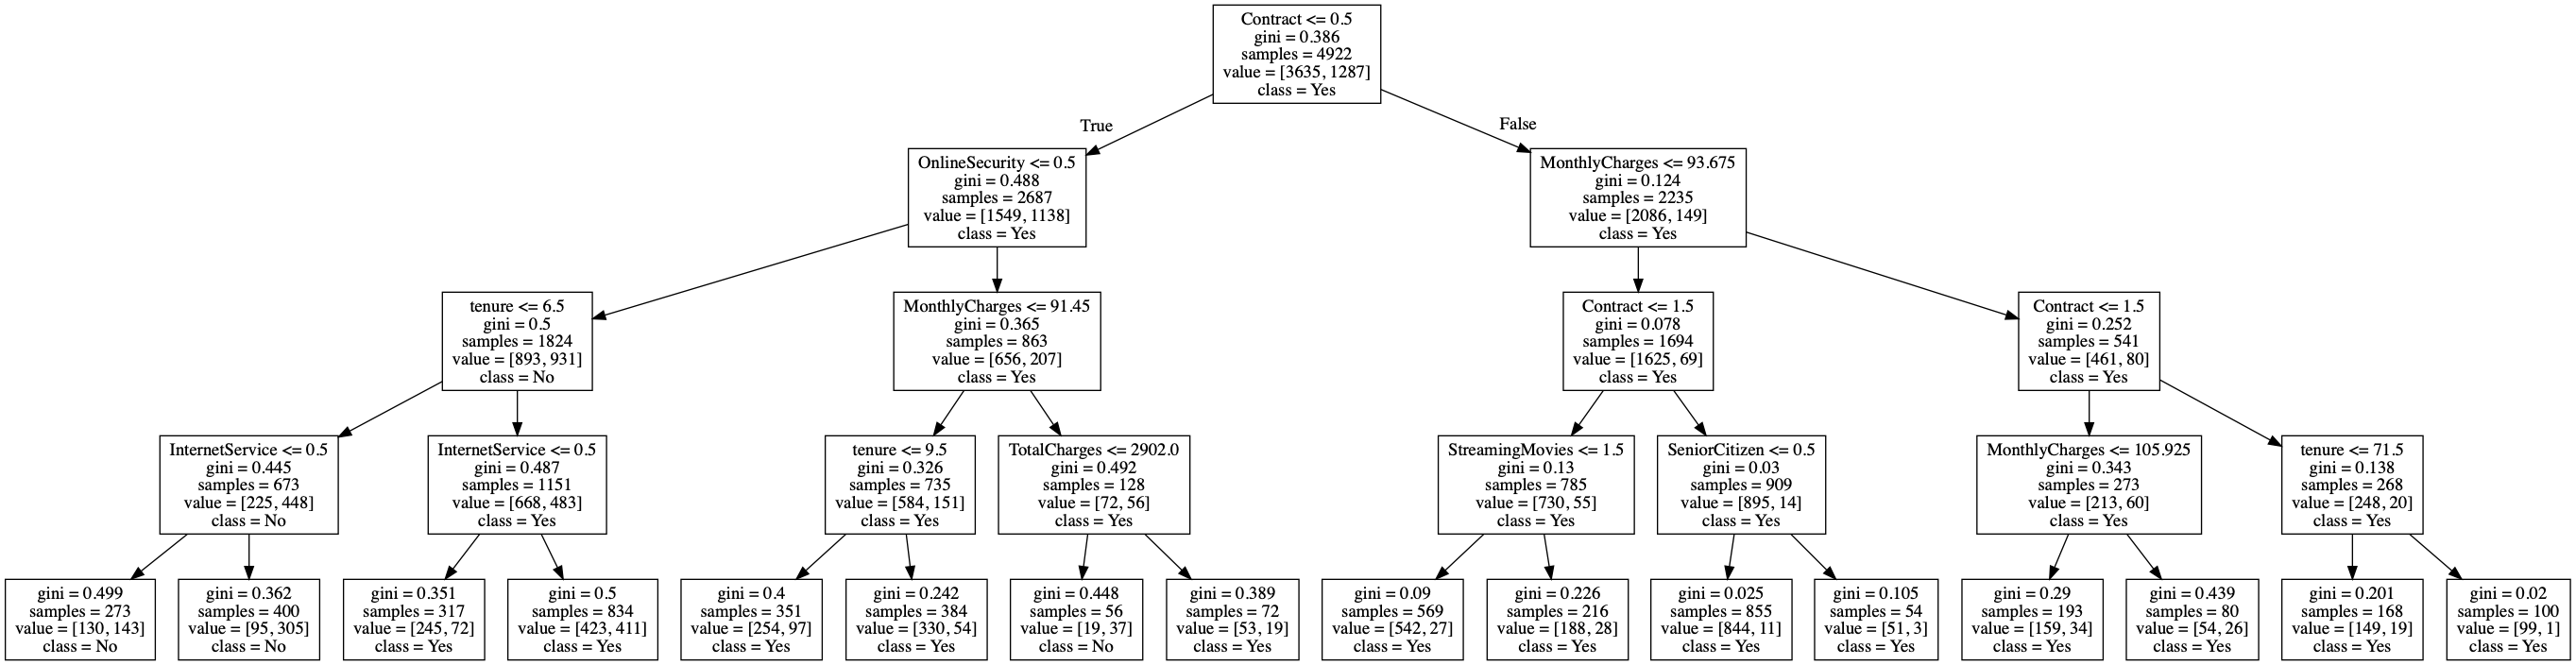

In [98]:
dot_data = tree.export_graphviz(dt, out_file=None, 
                                feature_names=X.columns,  
                                class_names=['Yes','No'])
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

### Random Forest Classification

In [99]:
# Running the random forest with default parameters.
rfc=RandomForestClassifier()

In [100]:
# Predicting using default Parameters
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [101]:
# Making predictions using the default model
y_pred=rfc.predict(X_test)

In [102]:
# Classification report of the default model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.80      0.89      0.85      1528
         Yes       0.60      0.43      0.50       582

   micro avg       0.76      0.76      0.76      2110
   macro avg       0.70      0.66      0.67      2110
weighted avg       0.75      0.76      0.75      2110



In [103]:
#Checking accuracy score and confusion matrix

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[1363  165]
 [ 332  250]]
0.7644549763033175


In [104]:
print('The default model has an accuracy score of', accuracy_score(y_test, y_pred))

The default model has an accuracy score of 0.7644549763033175


#### Tuning Hyperparameters

In [105]:
def hp_gridSearch(parameter, Range, n_folds):
    
    #parameters to build the model on
    parameters={ parameter: Range}

    #instantiate the model
    rf=RandomForestClassifier()

    rf= GridSearchCV(rf, parameters, cv=n_folds, scoring='accuracy')

    rf.fit(X_train, y_train)
    scores=pd.DataFrame(rf.cv_results_)
    display(scores.head())
    
    # plotting accuracies with max_depth
    plt.figure()
    plt.plot(scores["param_"+parameter], 
             scores["mean_train_score"], 
             label="training accuracy")
    plt.plot(scores["param_"+parameter], 
             scores["mean_test_score"], 
             label="test accuracy")
    plt.xlabel(parameter)
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()    

#### Max Features

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
0,0.032627,0.002024,0.004358,0.000321,2,{'max_features': 2},0.781973,0.791717,0.772229,0.789024,0.789024,0.783883,0.784640,0.006460,4,0.978298,0.983175,0.981956,0.981472,0.981716,0.978552,0.980862,0.001805
1,0.034906,0.000556,0.004129,0.000094,3,{'max_features': 3},0.794153,0.796590,0.779537,0.781707,0.786585,0.791209,0.788297,0.006255,2,0.978542,0.980493,0.978542,0.979278,0.980010,0.982939,0.979967,0.001508
2,0.033716,0.002455,0.003508,0.000256,4,{'max_features': 4},0.783191,0.796590,0.763703,0.780488,0.793902,0.785104,0.783828,0.010669,5,0.982199,0.985857,0.980249,0.984398,0.981229,0.981721,0.982609,0.001923
3,0.035401,0.000557,0.003354,0.000058,5,{'max_features': 5},0.785627,0.791717,0.773447,0.784146,0.780488,0.802198,0.786266,0.008999,3,0.978542,0.981712,0.982199,0.982204,0.980497,0.984402,0.981593,0.001787
4,0.039442,0.000411,0.003431,0.000124,6,{'max_features': 6},0.788063,0.789281,0.778319,0.785366,0.807317,0.791209,0.789923,0.008789,1,0.980980,0.980249,0.979273,0.979278,0.980741,0.982208,0.980455,0.001021


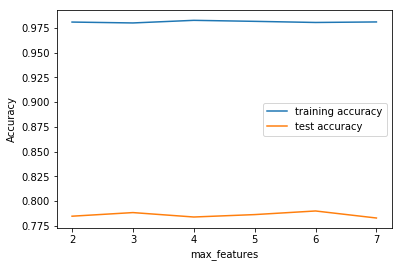

In [106]:
hp_gridSearch(parameter='max_features', Range=range(2,8,1), n_folds=6)

#### Max_depth

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
0,0.019857,0.001428,0.003445,0.000267,2,{'max_depth': 2},0.778319,0.772229,0.768575,0.757317,0.776829,0.766789,0.770012,0.007000,6,0.776884,0.770056,0.772982,0.774988,0.771087,0.772605,0.773100,0.002290
1,0.017892,0.001631,0.002798,0.000221,3,{'max_depth': 3},0.796590,0.786845,0.781973,0.784146,0.796341,0.776557,0.787078,0.007321,5,0.795172,0.790295,0.799805,0.793272,0.785714,0.797465,0.793621,0.004639
2,0.017948,0.000376,0.002751,0.000045,4,{'max_depth': 4},0.805116,0.803898,0.781973,0.787805,0.817073,0.798535,0.799065,0.011573,3,0.809802,0.802731,0.803950,0.800098,0.798635,0.802827,0.803007,0.003530
3,0.020028,0.000295,0.002857,0.000070,5,{'max_depth': 5},0.806334,0.796590,0.781973,0.798780,0.802439,0.796093,0.797034,0.007604,4,0.810046,0.803219,0.815411,0.806192,0.810580,0.812332,0.809630,0.003973
4,0.021627,0.000567,0.002912,0.000128,6,{'max_depth': 6},0.813642,0.817296,0.791717,0.801220,0.808537,0.805861,0.806380,0.008354,1,0.816874,0.821019,0.824433,0.823257,0.827157,0.814039,0.821130,0.004475


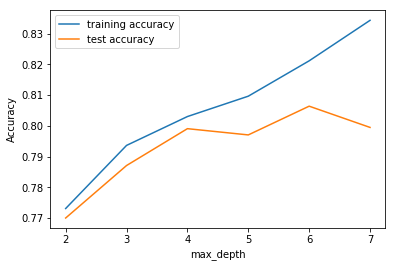

In [107]:
hp_gridSearch(parameter='max_depth', Range=range(2,8,1), n_folds=6)

#### Min_Samples_split

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
0,0.026235,0.003671,0.003359,0.000481,100,{'min_samples_split': 100},0.799026,0.816078,0.783191,0.796341,0.809756,0.810745,0.802519,0.011016,1,0.821019,0.812485,0.816386,0.819356,0.815456,0.817938,0.817107,0.002759
1,0.020416,0.000222,0.002791,0.000047,200,{'min_samples_split': 200},0.811206,0.816078,0.779537,0.796341,0.801220,0.794872,0.799878,0.011864,2,0.804926,0.810534,0.809559,0.805705,0.808386,0.805264,0.807396,0.002199
2,0.019195,0.000363,0.002845,0.000111,300,{'min_samples_split': 300},0.795371,0.799026,0.790499,0.785366,0.800000,0.800977,0.795205,0.005624,3,0.807120,0.801268,0.806145,0.804486,0.809361,0.802096,0.805079,0.002811
3,0.018262,0.000298,0.002784,0.000067,400,{'min_samples_split': 400},0.799026,0.795371,0.775883,0.789024,0.807317,0.787546,0.792361,0.009858,4,0.797854,0.796147,0.800049,0.800829,0.787421,0.798684,0.796831,0.004469
4,0.017173,0.000244,0.002668,0.000049,500,{'min_samples_split': 500},0.792935,0.786845,0.772229,0.781707,0.808537,0.791209,0.788907,0.011114,5,0.796635,0.793221,0.789564,0.790834,0.794490,0.787960,0.792117,0.002964


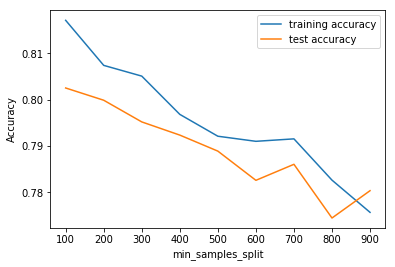

In [108]:
hp_gridSearch(parameter='min_samples_split', Range=range(100,1000,100), n_folds=6)

#### Min Samples Leaf

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
0,0.027530,0.003439,0.003579,0.000505,20,{'min_samples_leaf': 20},0.813642,0.817296,0.780755,0.795122,0.812195,0.809524,0.804754,0.012804,1,0.824921,0.824921,0.822970,0.823988,0.823257,0.823300,0.823893,0.000788
1,0.021720,0.000384,0.002986,0.000042,40,{'min_samples_leaf': 40},0.792935,0.800244,0.780755,0.792683,0.803659,0.802198,0.795408,0.007809,2,0.812485,0.805657,0.815167,0.816187,0.816431,0.810139,0.812678,0.003838
2,0.020546,0.000627,0.002889,0.000087,60,{'min_samples_leaf': 60},0.794153,0.801462,0.777101,0.785366,0.808537,0.797314,0.793986,0.010314,4,0.799073,0.811509,0.814192,0.802779,0.811799,0.796734,0.806014,0.006774
3,0.019419,0.000366,0.002812,0.000047,80,{'min_samples_leaf': 80},0.797808,0.809988,0.779537,0.780488,0.804878,0.797314,0.795002,0.011441,3,0.806389,0.804682,0.802243,0.804729,0.798391,0.804533,0.803495,0.002582


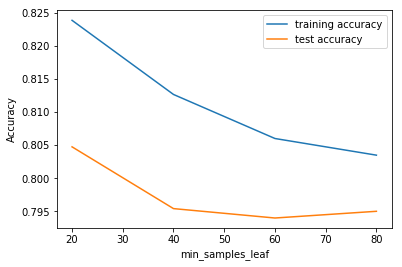

In [109]:
hp_gridSearch(parameter='min_samples_leaf', Range=range(20,100,20), n_folds=6)

#### N_estimators

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
0,1.606437,0.144454,0.092306,0.015741,500,{'n_estimators': 500},0.799026,0.807552,0.788063,0.801220,0.797561,0.799756,0.798862,0.005779,5,0.998537,0.998537,0.997318,0.997806,0.997562,0.997806,0.997928,0.000461
1,2.069037,0.104273,0.130850,0.030944,700,{'n_estimators': 700},0.801462,0.811206,0.797808,0.800000,0.793902,0.798535,0.800488,0.005331,3,0.998537,0.998537,0.997318,0.997806,0.997562,0.997806,0.997928,0.000461
2,2.571683,0.018597,0.144061,0.004031,900,{'n_estimators': 900},0.799026,0.813642,0.794153,0.801220,0.796341,0.804640,0.801503,0.006380,1,0.998537,0.998537,0.997318,0.997806,0.997562,0.997806,0.997928,0.000461
3,3.188863,0.029653,0.175734,0.001064,1100,{'n_estimators': 1100},0.795371,0.807552,0.792935,0.807317,0.796341,0.798535,0.799675,0.005728,4,0.998537,0.998537,0.997318,0.997806,0.997562,0.997806,0.997928,0.000461
4,3.723553,0.029310,0.212625,0.010943,1300,{'n_estimators': 1300},0.801462,0.806334,0.791717,0.803659,0.798780,0.804640,0.801097,0.004832,2,0.998537,0.998537,0.997318,0.997806,0.997562,0.997806,0.997928,0.000461


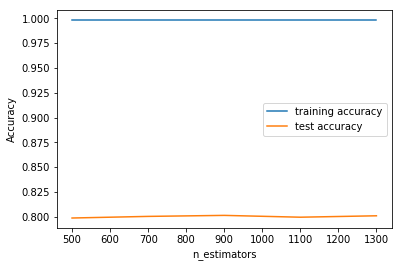

In [110]:
hp_gridSearch(parameter='n_estimators', Range=range(500,1500,200), n_folds=6)

#### Overall Optimal Parameters

In [111]:
def hp_optimalGridSearch(parameter, Range, n_folds):
    
    #parameters to build the model on
    parameters=dict(zip(parameter, Range))

    #instantiate the model
    rf=RandomForestClassifier()

    grid_search= GridSearchCV(rf, parameters, cv=n_folds, scoring='accuracy', n_jobs = -1,verbose = 1)

    grid_search.fit(X_train, y_train)
   
    # printing the optimal accuracy score and hyperparameters
    print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)
     

In [112]:
hp_optimalGridSearch(parameter=['max_features','max_depth','min_samples_split','min_samples_leaf','n_estimators'],
                     Range=[[4,6],[4,6],[400,500,600],[40,50,60],[1000,1500]],
                    n_folds=6)

Fitting 6 folds for each of 72 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:  4.2min finished


We can get accuracy of 0.7986590816741163 using {'max_depth': 4, 'max_features': 6, 'min_samples_leaf': 40, 'min_samples_split': 400, 'n_estimators': 1500}


### Fitting the final model with the best parameters obtained from grid search.¶

In [113]:
# model with the best hyperparameters
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=4,
                             min_samples_leaf=40, 
                             min_samples_split=400,
                             max_features=6,
                             n_estimators=1500)

In [114]:
# fit
rfc.fit(X_train,y_train)

# predict
predictions = rfc.predict(X_test)

In [115]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          No       0.81      0.93      0.87      1528
         Yes       0.70      0.43      0.53       582

   micro avg       0.79      0.79      0.79      2110
   macro avg       0.76      0.68      0.70      2110
weighted avg       0.78      0.79      0.77      2110



In [116]:
print(confusion_matrix(y_test,predictions))

[[1423  105]
 [ 332  250]]


In [117]:
print(accuracy_score(y_test, predictions))

0.7928909952606635
